## 載入與調整資料

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("E:/data/ClusteringHSS.csv")
print(df.head())

   ID Gender_Code Region  Income  Spending
0   1      Female  Rural    20.0      15.0
1   2        Male  Rural     5.0      12.0
2   3      Female  Urban    28.0      18.0
3   4        Male  Urban    40.0      10.0
4   5        Male  Urban    42.0       9.0


## 檢查資料

In [2]:
print(df.isnull().values.sum())
print("資料筆數:", df.shape)
print("資料的欄位名稱，分別是:", df.keys())
print("第一筆的資料內容:", df.iloc[0,::])
print(df.dtypes)

23
資料筆數: (1113, 5)
資料的欄位名稱，分別是: Index(['ID', 'Gender_Code', 'Region', 'Income', 'Spending'], dtype='object')
第一筆的資料內容: ID                  1
Gender_Code    Female
Region          Rural
Income             20
Spending           15
Name: 0, dtype: object
ID               int64
Gender_Code     object
Region          object
Income         float64
Spending       float64
dtype: object


## 整理資料

In [10]:
df = df.dropna()
LE = LabelEncoder()
df['Gender_Code'] = LE.fit_transform(df['Gender_Code'])
LE = LabelEncoder()
df['Region'] = LE.fit_transform(df['Region'])
X = df.drop(['ID'],axis=1)
print(X.head())

   Gender_Code  Region  Income  Spending
0            0       0    20.0      15.0
1            1       0     5.0      12.0
2            0       1    28.0      18.0
3            1       1    40.0      10.0
4            1       1    42.0       9.0


## 建立與訓練模組

In [4]:
model = KMeans(init = "k-means++", n_clusters = 5)
model.fit(X)
print(model.cluster_centers_)

[[ 5.01930502e-01  2.89575290e-01  2.31544402e+01  1.08301158e+01]
 [ 5.61702128e-01  1.00000000e+00  4.51617021e+01  1.14595745e+01]
 [ 5.14893617e-01 -1.66533454e-16  1.04723404e+01  8.25957447e+00]
 [ 5.50660793e-01  1.00000000e+00  3.35418502e+01  1.13348018e+01]
 [ 4.17910448e-01 -1.11022302e-16  1.25149254e+01  1.66865672e+01]]


## 模型預測

In [5]:
model.predict(X)

array([0, 2, 3, ..., 3, 1, 0])

In [6]:
X["群"] = model.labels_
print(X.groupby('群').mean()) 

   Gender_Code    Region     Income   Spending
群                                             
0     0.503846  0.288462  23.134615  10.842308
1     0.561702  1.000000  45.161702  11.459574
2     0.514894  0.000000  10.472340   8.259574
3     0.550661  1.000000  33.541850  11.334802
4     0.413534  0.000000  12.473684  16.706767


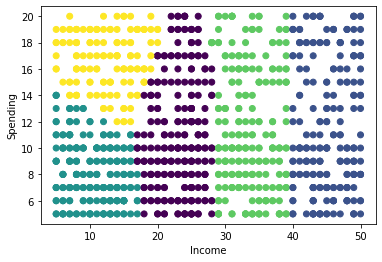

In [7]:
plt.scatter(X['Income'], X['Spending'], c=model.labels_)
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()

## 使用模組的屬性inertia_決定分群數

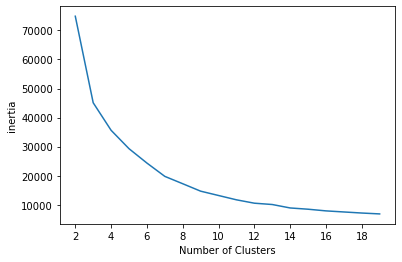

In [8]:
iner = []
for i in range(2,20):
    model = KMeans(init = "k-means++", n_clusters = i)
    model.fit(X)
    iner.append(model.inertia_)
plt.plot(range(2, 20), iner)
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.xticks(range(2,20,2))
plt.show()

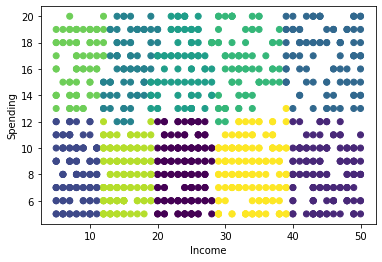

In [9]:
model = KMeans(init = "k-means++", n_clusters = 10)
model.fit(X)
plt.scatter(X['Income'], X['Spending'], c=model.labels_)
plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()